In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/HYF/Graduation_Fin/GraduationProject_Fin
!pip install jqdatasdk
!pip install backtrader
!pip install neuralprophet
!pip install tensorboardX

/content/drive/MyDrive/HYF/Graduation_Fin/GraduationProject_Fin
     |████████████████████████████████| 153 kB 2.7 MB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 361 kB 25.1 MB/s 
     |████████████████████████████████| 49 kB 8.1 MB/s 
  Created wheel for thriftpy2: filename=thriftpy2-0.4.14-cp37-cp37m-linux_x86_64.whl size=944425 sha256=b3556bee13efaaaa89d0ba0e4f49534229d56df96af9d48a742bcd44361a1b1a
  Stored in directory: /root/.cache/pip/wheels/2a/f5/49/9c0d851aa64b58db72883cf9393cc824d536bdf13f5c83cff4
Successfully built thriftpy2
     |████████████████████████████████| 410 kB 8.4 MB/s 
     |████████████████████████████████| 74 kB 3.7 MB/s 
     |████████████████████████████████| 172 kB 20.8 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2


     |████████████████████████████████| 125 kB 9.1 MB/s 


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from jqdatasdk import *
auth('15857500957','Qazwsxedcrfv0957')

auth success 


# 获取行业股票代码


In [ ]:
grid_codes=get_industries(name='zjw', date=None)
grid_codes['start_date']=pd.to_datetime(grid_codes['start_date'])
grid_codes=grid_codes[grid_codes['start_date']<pd.to_datetime('2018-01-01')]
grid_codes

,name,start_date
L72,商务服务业,1996-08-29
L71,租赁业,1997-01-30
G53,铁路运输业,1998-05-11
G57,管道运输业,1996-11-04
G56,航空运输业,1997-11-05
...,...,...
G60,邮政业,2017-02-16
N76,水利管理业,2012-01-01
N77,生态保护和环境治理业,2012-10-26
N78,公共设施管理业,1992-08-07


In [ ]:
indexes=get_all_securities(types=['index'], date=None)
indexes

,display_name,name,start_date,end_date,type
000001.XSHG,上证指数,SZZS,1991-07-15,2200-01-01,index
000002.XSHG,A股指数,AGZS,1992-02-21,2200-01-01,index
000003.XSHG,B股指数,BGZS,1992-02-21,2200-01-01,index
000004.XSHG,工业指数,GYZS,1993-05-03,2200-01-01,index
000005.XSHG,商业指数,SYZS,1993-05-03,2200-01-01,index
...,...,...,...,...,...
399994.XSHE,中证信息安全主题指数,XXAQ,2015-03-12,2200-01-01,index
399995.XSHE,中证基建工程指数,JJGC,2015-03-12,2200-01-01,index
399996.XSHE,中证智能家居指数,ZNJJ,2014-09-17,2200-01-01,index
399997.XSHE,中证白酒指数,ZZBJ,2015-01-21,2200-01-01,index


In [ ]:
indexes[['银行' in i for i in indexes['display_name'].values]]

,display_name,name,start_date,end_date,type
000134.XSHG,上证银行,SZYH,2012-05-29,2200-01-01,index
000849.XSHG,沪深300非银行金融指数,300FY,2012-12-21,2200-01-01,index
000947.XSHG,内地银行,NDYH,2009-10-28,2020-04-22,index
000951.XSHG,300银行,300YH,2009-10-28,2020-04-22,index
399431.XSHE,国证银行行业指数,GZYH,2014-12-30,2200-01-01,index
399947.XSHE,中证内地银行主题指数,NDYH,2009-10-28,2020-04-22,index
399951.XSHE,沪深300银行指数,300YH,2009-10-28,2020-04-22,index
399986.XSHE,中证银行指数,ZZYH,2013-07-15,2200-01-01,index


In [ ]:
bank_codes_in_index=get_index_stocks('399951.XSHE', date=None)
bank_codes_in_index

['000001.XSHE',
 '002142.XSHE',
 '600000.XSHG',
 '600015.XSHG',
 '600016.XSHG',
 '600036.XSHG',
 '600919.XSHG',
 '600926.XSHG',
 '601009.XSHG',
 '601166.XSHG',
 '601169.XSHG',
 '601229.XSHG',
 '601288.XSHG',
 '601328.XSHG',
 '601398.XSHG',
 '601658.XSHG',
 '601818.XSHG',
 '601838.XSHG',
 '601916.XSHG',
 '601939.XSHG',
 '601988.XSHG',
 '601998.XSHG']

In [ ]:
get_index_weights('399951.XSHE', date=None)

,date,weight,display_name
000001.XSHE,2022-03-31,6.145,平安银行
600000.XSHG,2022-03-31,3.867,浦发银行
600015.XSHG,2022-03-31,1.409,华夏银行
600016.XSHG,2022-03-31,3.905,民生银行
600036.XSHG,2022-03-31,23.851,招商银行
601988.XSHG,2022-03-31,2.838,中国银行
601398.XSHG,2022-03-31,6.884,工商银行
601166.XSHG,2022-03-31,12.377,兴业银行
601998.XSHG,2022-03-31,0.642,中信银行
601328.XSHG,2022-03-31,5.781,交通银行


In [ ]:
get_price('399951.XSHE', start_date=None, end_date=None, frequency='daily', fields=None, skip_paused=True, fq='pre', count=None)

D:\Softwares\Python\Python3.9\lib\site-packages\jqdatasdk\api.py:34: PanelObsoleteWarning: 当前环境 pandas 版本高于 0.25，get_price 与 get_fundamentals_continuously 接口的 panel 参数将固定为 False（0.25 及以上版本的 pandas 不再支持 panel，如使用该数据结构和相关函数请注意修改）
  warnings.warn(PandasChecker.VERSION_NOTICE_MESSAGE, PanelObsoleteWarning)


,open,close,high,low,volume,money
2015-01-05,5686.73,5734.34,5813.64,5581.03,1.124399e+10,8.776200e+10
2015-01-06,5658.20,5670.32,5893.70,5602.65,1.074532e+10,8.264207e+10
2015-01-07,5590.37,5596.06,5695.48,5505.76,7.268951e+09,5.669385e+10
2015-01-08,5616.93,5389.53,5627.04,5376.21,6.580879e+09,4.950320e+10
2015-01-09,5364.44,5443.10,5731.54,5330.16,1.042957e+10,7.954020e+10
...,...,...,...,...,...,...
2015-12-25,5690.60,5709.41,5721.90,5675.25,1.237392e+09,1.144111e+10
2015-12-28,5707.99,5540.29,5715.95,5538.38,2.002733e+09,1.693987e+10
2015-12-29,5535.99,5595.20,5617.32,5519.74,1.214660e+09,1.049406e+10
2015-12-30,5582.39,5612.50,5613.50,5518.33,1.215887e+09,1.097753e+10


In [ ]:
# bank_codes=get_industry_stocks('801780', date=None)
# bank_codes[:5]

['000001.XSHE', '001227.XSHE', '002142.XSHE', '002807.XSHE', '002839.XSHE']

In [ ]:
# # 行业指数数据
# grid_index=finance.run_query(query(finance.SW1_DAILY_PRICE).filter(finance.SW1_DAILY_PRICE.code=='801010').limit(10))
# print(grid_index)

    id        date    code  name     open     high      low    close  \
0   14  1999-12-30  801010  农林牧渔  1000.00  1000.00  1000.00  1000.00   
1   53  2000-01-04  801010  农林牧渔  1001.98  1035.36   985.47  1027.66   
2   87  2000-01-05  801010  农林牧渔  1035.47  1057.85  1013.07  1028.87   
3  121  2000-01-06  801010  农林牧渔  1025.38  1070.79  1011.00  1065.67   
4  155  2000-01-07  801010  农林牧渔  1076.06  1117.71  1058.83  1106.19   
5  189  2000-01-10  801010  农林牧渔  1108.57  1144.09  1082.38  1130.06   
6  223  2000-01-11  801010  农林牧渔  1135.11  1145.76  1082.01  1104.18   
7  257  2000-01-12  801010  农林牧渔  1094.59  1114.88  1061.11  1080.40   
8  291  2000-01-13  801010  农林牧渔  1078.21  1091.29  1051.82  1066.57   
9  325  2000-01-14  801010  农林牧渔  1070.44  1085.36  1041.54  1062.16   

       volume         money  change_pct  
0   9864744.0  1.239666e+08        0.00  
1  14011599.0  1.831998e+08        2.77  
2  25330869.0  2.904446e+08        0.12  
3  30202752.0  4.214445e+08        3.58

In [ ]:
Photovoltaic=[normalize_code(i) for i in ["300827","301168","603185","688556","300274","600438","601012","688680","002610","002506","688223","603806","002129","603396","688599","688303","300118","601865","600537","002459","688032","300393","688560","300316","600732","002617","002218","300842","301046","688516","002309","603105","002623","603628","688598","300029","688408","300317","300763","688390","600207","600151","603212"]]
battery=[normalize_code(i) for i in["002850","300438","002684","300750","603659","300648","688339","300207","688063","601311","002812","300037","688006","300116","000049","688819","300068","300457","300450","688148","605378","688772","688345","300340","300568","688567","300890","002733","688388","002580","688779","600110","002245","002074","300014","300919","300073","600847","688707","002192"]]
energymetal=[normalize_code(i) for i in["002340","600711","300618","002240","002460","002466","603799"]]
others=[normalize_code(i) for i in ["600519","601318","600036","000858","601012","000333","600276","002415","601166","601888","603259","300059","000651","600900","002594","002475","600887","000001","000725","600030","300015","601398","000568","600031","600309","603501","000002","603288","002714","600809","300122","601919","002142","600436","601328","601899","002304","002352","002812","002230","300014","300274","600000","600438","300124","600837","000661","000100","601816","000063","002241","300347","603986","002271","002460","600585","600690","601601","601668","002027","300142","603799","600016","600763","600196","601288","000338","600048","600703","600919","002129","600050","601229","601688","600660","600104","600570","601211","601766","601169","688111","600999","002311","002371","600019","002049","002410","300498","600406","601088","601988","300601","601818","000538","000625","600745","600028","600893","300450","600346","601628","601658","002493","002821","300595","600588","601009","601390","601633","601377","601857","688036","300413","002601","300408","600009","600132","600584","601225","000776","000895","002001","300433","600111","600426","600926","601100","601939","603882","688012","000166","002050","002179","600958","000786","000963","002007","002841","300003","600600","600741","000157","002236","002607","600015","600029","600143","601006","601155","601336","601901","601989","603806","000768","600010","600176","600352","600760","601138","601877","603993","000876","001979","002008","002202","300529","600547","601186","601600","601788","601916","603369","688169","000938","002555","002736","003816","601799","603899","000069","000425","300136","600109","600150","600989","601066","601669","603160","000596","000783","000977","002384","002624","300558","300677","600079","600085","600183","600795","600886","601238","601838","603019","603659","688008","000066","000703","002044","002252","002414","002600","002938","300144","300676","600522","601077","601108","601360","601555","601985","603517","603833","000728","002602","300033","300628","600115","600161","600332","600362","600383","600845","600872","601111","601607","601800","688396","000708","000860","002024","002508","002916","600061","600705","601021","601162","601618","601727","601878","000656","002157","002456","002463","600011","600521","600606","601990","603939","688363","002558","600018","600118","600489","600655","600848","601216","601696","601933","601995","603392","002120","002673","002739","601319","601872","601881","601998","603195","603338","688009","688126","600233","603233","603658","000800","002032","002153","002939","600025","600340","600482","601231","601236","002773","600918","601808","601698","603087","002945","600299"]]

all_code=[]
# all_code.extend(Photovoltaic)
# all_code.extend(battery)
# all_code.extend(energymetal)
all_code.extend(others)


Photovoltaic=Photovoltaic[:2]
battery=battery[:2]
energymetal=energymetal[:2]

## 获取所有股票一段时间的close

In [ ]:
# all_price=rqdatac.get_price(all_code,start_date='2021-07-01',end_date='2021-12-31',frequency='1d',fields='close',expect_df=False)
# print(all_price.head())
# np.where(all_price.isna())
import jqdatasdk
all_price=jqdatasdk.get_price(all_code,start_date='2021-07-01',end_date='2021-12-31',frequency='daily',fields='close')
print(all_price.head())
# np.where(all_price.isna())

D:\Softwares\Python\Python3.9\lib\site-packages\jqdatasdk\api.py:34: PanelObsoleteWarning: 当前环境 pandas 版本高于 0.25，get_price 与 get_fundamentals_continuously 接口的 panel 参数将固定为 False（0.25 及以上版本的 pandas 不再支持 panel，如使用该数据结构和相关函数请注意修改）
  warnings.warn(PandasChecker.VERSION_NOTICE_MESSAGE, PanelObsoleteWarning)


        time         code   close
0 2021-07-01  600763.XSHG  411.82
1 2021-07-02  600763.XSHG  396.01
2 2021-07-05  600763.XSHG  401.60
3 2021-07-06  600763.XSHG  361.44
4 2021-07-07  600763.XSHG  373.00


In [ ]:
len(all_price)/len(all_code)

125.0

In [ ]:
temp=None
for c in all_code:
    if temp is None:
        temp=all_price.groupby("code").get_group(c).set_index("time").drop(columns=['code'])
        temp.rename(columns={'close':c},inplace=True)
        # print(temp)
    else:
        # temp.insert(0,c,all_price.groupby("code").get_group(c).set_index("time").drop(columns=['code']))
        temp=pd.concat([temp,all_price.groupby("code").get_group(c).set_index("time").drop(columns=['code']).rename(columns={'close':c},inplace=False)],axis=1,join='outer')

print(temp)
all_price=temp

            600519.XSHG  601318.XSHG  600036.XSHG  000858.XSHE  601012.XSHG  \
time                                                                          
2021-07-01      2105.00        63.72        54.61       295.35        85.12   
2021-07-02      2013.00        61.30        51.73       283.30        82.66   
2021-07-05      1994.00        60.92        51.63       278.41        84.06   
2021-07-06      2012.90        61.89        52.21       274.60        82.77   
2021-07-07      2004.00        61.37        52.10       281.87        89.88   
...                 ...          ...          ...          ...          ...   
2021-12-27      2131.82        49.98        49.33       236.21        78.14   
2021-12-28      2138.18        50.87        49.63       237.58        81.55   
2021-12-29      2041.00        50.81        47.62       225.70        82.01   
2021-12-30      2075.00        50.41        48.50       225.50        81.23   
2021-12-31      2050.00        50.41        48.71   

In [ ]:
from myconfig import *
# 95%的时间都有数据
all_price.dropna(axis=1,how='any',thresh=int(THRESHOLD*len(all_price)),inplace=True)
np.where(all_price.isna())

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
# todo 这里可以做一个展示，将真实的股票数据进行掩码，验证三项式是否足矣拟合短期股价变化
all_price.interpolate(method='polynomial', order=3,axis=0,inplace=True)


In [ ]:
all_price_log=np.log(all_price)
all_price_log.diff(1)[1:]

,600519.XSHG,601318.XSHG,600036.XSHG,000858.XSHE,601012.XSHG,000333.XSHE,600276.XSHG,002415.XSHE,601166.XSHG,601888.XSHG,...,600482.XSHG,601231.XSHG,601236.XSHG,002773.XSHE,600918.XSHG,601808.XSHG,601698.XSHG,603087.XSHG,002945.XSHE,600299.XSHG
time,,,,,,,,,,,,,,,,,,,,,
2021-07-02,-0.044689,-0.038719,-0.054179,-0.041655,-0.029326,-0.029654,-0.040708,-0.045862,-0.024704,-0.065108,...,0.000000,-0.008669,-0.022748,-0.043378,-0.029328,0.012632,-0.047534,-0.009923,-0.014850,-0.022911
2021-07-05,-0.009483,-0.006218,-0.001935,-0.017412,0.016795,-0.041643,-0.061008,-0.017020,0.011953,-0.004278,...,-0.004158,0.021533,0.000885,-0.012417,-0.005970,-0.009811,0.014099,-0.012211,-0.004736,-0.002578
2021-07-06,0.009434,0.015797,0.011171,-0.013779,-0.015465,0.005994,-0.014239,-0.009032,0.020231,0.005736,...,0.004751,-0.014715,-0.000885,0.005077,0.000000,0.012596,-0.004008,-0.051895,-0.001584,0.009422
2021-07-07,-0.004431,-0.008437,-0.002109,0.026130,0.082410,0.025613,0.006265,0.018793,-0.006073,-0.023361,...,-0.003561,-0.006196,0.045836,-0.000461,-0.000999,0.001390,0.001338,0.002004,0.001584,-0.010283
2021-07-08,-0.009526,-0.025748,-0.059306,-0.053224,0.009082,-0.005556,-0.017445,-0.011561,-0.030450,-0.020611,...,0.007109,0.030602,0.010093,-0.026606,-0.002000,-0.025318,0.010638,-0.018490,-0.009539,-0.019131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,-0.028791,0.003206,-0.010687,-0.023969,0.003333,0.012258,0.005769,0.001779,-0.011604,0.009591,...,0.004677,-0.017476,0.003552,0.026541,0.006048,-0.005424,0.004977,0.014431,-0.014514,0.023161
2021-12-28,0.002979,0.017650,0.006063,0.005783,0.042714,0.028741,-0.004772,0.035881,0.010029,0.012288,...,0.017472,-0.004264,0.095471,-0.005252,0.005013,0.019523,0.010582,0.003366,0.049208,-0.007386
2021-12-29,-0.046515,-0.001180,-0.041343,-0.051298,0.005625,-0.015685,-0.009010,-0.009956,-0.006322,-0.030730,...,0.030108,-0.025349,-0.041124,0.003155,-0.011061,0.000000,0.047285,-0.014383,-0.043377,0.011466


In [ ]:
all_change=all_price.pct_change()[1:]
all_change_log=all_price_log.diff()[1:]
print(all_change.iloc[:,0].head())


time
2021-07-02   -0.043705
2021-07-05   -0.009439
2021-07-06    0.009478
2021-07-07   -0.004421
2021-07-08   -0.009481
Name: 600519.XSHG, dtype: float64


In [ ]:
print(all_change_log.iloc[:,0].head())

time
2021-07-02   -0.044689
2021-07-05   -0.009483
2021-07-06    0.009434
2021-07-07   -0.004431
2021-07-08   -0.009526
Name: 600519.XSHG, dtype: float64


In [ ]:
all_change_log.corr()

,600519.XSHG,601318.XSHG,600036.XSHG,000858.XSHE,601012.XSHG,000333.XSHE,600276.XSHG,002415.XSHE,601166.XSHG,601888.XSHG,...,600482.XSHG,601231.XSHG,601236.XSHG,002773.XSHE,600918.XSHG,601808.XSHG,601698.XSHG,603087.XSHG,002945.XSHE,600299.XSHG
600519.XSHG,1.000000,0.352521,0.443682,0.877529,0.150748,0.395835,0.447776,0.409484,0.331397,0.540407,...,-0.191130,0.261725,0.137474,0.267370,0.157294,-0.029220,0.074885,0.395948,0.060651,0.160092
601318.XSHG,0.352521,1.000000,0.647381,0.418267,-0.029587,0.539160,0.368907,0.389136,0.668349,0.237052,...,0.032616,0.083234,0.282988,0.383589,0.334241,0.232344,0.040324,0.168811,0.130720,0.269560
600036.XSHG,0.443682,0.647381,1.000000,0.481442,0.010536,0.476371,0.244533,0.422153,0.766764,0.331251,...,0.020590,0.076439,0.316569,0.229544,0.405340,0.124905,-0.052818,0.121904,0.252943,0.230710
000858.XSHE,0.877529,0.418267,0.481442,1.000000,0.137649,0.449620,0.537491,0.503613,0.374717,0.639514,...,-0.172066,0.194455,0.231634,0.343544,0.194105,0.012417,0.082753,0.466523,0.113699,0.176335
601012.XSHG,0.150748,-0.029587,0.010536,0.137649,1.000000,0.009553,0.082115,0.202841,-0.023416,0.107415,...,-0.064845,-0.071975,0.160918,-0.044081,0.058863,0.039218,-0.000124,0.060344,-0.031442,-0.059116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601808.XSHG,-0.029220,0.232344,0.124905,0.012417,0.039218,0.158041,0.117122,0.159680,0.220112,-0.019372,...,0.307354,0.094898,0.110862,0.186006,0.233094,1.000000,0.256909,0.107264,0.079065,0.227770
601698.XSHG,0.074885,0.040324,-0.052818,0.082753,-0.000124,0.119960,0.032862,0.169356,0.085135,0.046350,...,0.396425,0.301908,0.153706,0.238301,0.231643,0.256909,1.000000,0.126309,0.037808,0.127971
603087.XSHG,0.395948,0.168811,0.121904,0.466523,0.060344,0.268095,0.420080,0.294473,0.194065,0.394689,...,-0.148630,0.245571,0.123501,0.338371,0.113595,0.107264,0.126309,1.000000,0.015535,0.092769
002945.XSHE,0.060651,0.130720,0.252943,0.113699,-0.031442,0.181469,0.066786,0.255075,0.288055,0.107142,...,0.110186,0.029584,0.270855,0.115338,0.289848,0.079065,0.037808,0.015535,1.000000,0.022048


# 3维PCA展示

(124, 3)


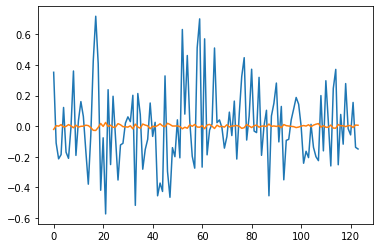

In [ ]:
reduced=PCA(n_components=3).fit_transform(all_change_log)
print(reduced.shape)
plt.plot(np.sum(reduced,axis=1))
plt.plot(all_change_log.mean(axis=1).values)
plt.show()

In [ ]:
from sklearn.cluster import OPTICS
coords=np.matmul(reduced.T,all_change_log.values).T
tags=OPTICS().fit_predict(coords)
print(tags)

[-1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  0  4 -1 -1  0 -1  2  3 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  6 -1 -1  6  4 -1 -1 -1 -1 -1 -1 -1  4  8 -1 -1 -1  2
 -1 -1 -1  6 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1  6 -1 -1 -1 -1  1  7  4
  4 -1 -1 -1 -1  3 -1  4 -1  3 -1  7 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  8 -1
  5  8  7 -1 -1 -1 -1 -1 -1 -1  1  5  7 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
 -1  2 -1 -1 -1 -1 -1 -1  6  8 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  4 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  5  8 -1 -1 -1  0 -1 -1 -1  6 -1  5
 -1  3 -1 -1  6 -1 -1  3  5 -1 -1 -1 -1  0  3 -1 -1 -1 -1 -1  6 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  5  8  1 -1  7 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1  4
  3 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  5 -1 -1 -1 -1 -1 -1 -1 -1 -1  0
  2 -1 -1  0 -1 -1 -1 -1  2  1  5 -1 -1  0 -1 -1 -1  3 -1 -1 -1 -1 -1 -1
  5 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1]


In [ ]:
# %matplotlib notebook 


C:\Users\TEMP\ipykernel_22540\1085353392.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


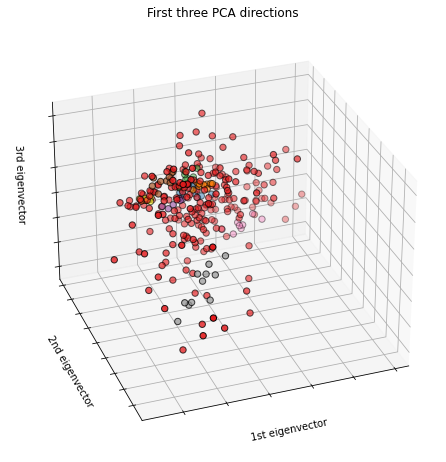

In [ ]:

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(
    coords[:, 0],
    coords[:, 1],
    coords[:, 2],
    c=tags,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# 高维pca，实际运算

(124, 10)


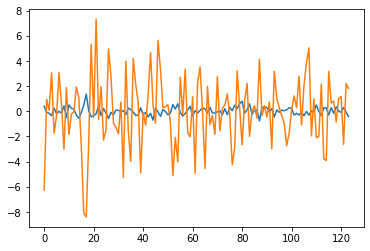

In [ ]:
pca=PCA(n_components=10)
pca.fit(all_change_log)
reduced=pca.transform(all_change_log)
print(reduced.shape)
plt.plot(np.sum(reduced,axis=1))
plt.plot(all_change_log.sum(axis=1).values)
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
print(pca.singular_values_)

[0.14112256 0.09492971 0.07738067 0.03508581 0.03173643 0.02570231
 0.02446523 0.02154926 0.01893744 0.01750156]
0.4884109855884118
[1.92538801 1.57914178 1.42572667 0.96003222 0.91305952 0.82168645
 0.80166831 0.75237815 0.70531111 0.67804484]


In [ ]:
# 十维坐标
coords=np.matmul(reduced.T,all_change_log.values).T
coords.shape

(300, 10)

In [ ]:
from sklearn.cluster import OPTICS
"""
    min_samples	int > 1 or float between 0 and 1 (default=5)
一个点被视为核心点的邻域样本数。此外，上下陡峭地区不能有超过min_samples连续的非陡峭点。表示为样本数的绝对值或一小部分(四舍五入至少为2)。

max_eps	float, optional (default=np.inf)
两个样本之间的最大距离，其中一个被视为另一个样本的邻域。np.inf默认值将识别所有规模的聚类；减少max_eps会缩短运行时间。

    min_cluster_size	int > 1 or float between 0 and 1 (default=None)
OPTICS聚类中的最小样本数，表示为样本数的绝对值或一部分(四舍五入为至少2)。如果为None, min_samples的值将被使用。只有当cluster_method='xi'才被使用

"""
tags=OPTICS().fit_predict(coords)
print(set(tags))
print(tags)

{0, 1, 2, 3, 4, 5, -1}
[-1  2  2 -1  5 -1 -1 -1  2 -1 -1 -1 -1  3  5 -1  0 -1 -1  1 -1  3 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  2 -1  3 -1 -1 -1 -1 -1 -1 -1  3  5 -1 -1 -1 -1
  3 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1  3 -1 -1  3 -1 -1 -1  2  5  3
  3  1 -1 -1 -1  1 -1  3 -1  1 -1 -1  4 -1 -1 -1 -1 -1  3 -1  3 -1 -1 -1
 -1 -1  5 -1  2  3 -1 -1 -1 -1  2 -1  5 -1 -1 -1 -1 -1 -1  2 -1 -1  4 -1
 -1 -1 -1 -1 -1  2 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  3  3 -1  3 -1  2 -1 -1  5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1  3 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  4 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  5  2 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1  3
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1  0 -1 -1 -1 -1  3  3 -1 -1 -1 -1 -1
 -1 -1 -1  3 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0
 -1  4 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1]


### 十维坐标系内聚类后在三维显示

C:\Users\TEMP\ipykernel_22540\2143635125.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


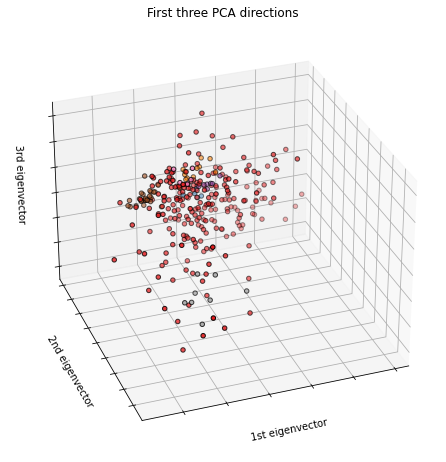

In [ ]:

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(
    coords[:, 0],
    coords[:, 1],
    coords[:, 2],
    c=tags,
    cmap=plt.cm.Set1,
    edgecolor="k",
    # s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [ ]:
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.vector_ar.vecm import coint_johansen

from statsmodels.tsa.stattools import adfuller

## 先判断是否一阶单整
```
股价、yield等是I(1) series，return是I(0)Series，说明他的阶数为0（已经是弱单整了）

我们首先来说一说整体思路~
步骤1.  首先我们要对找到适合的（相关性高）股票，然后进行平稳性检验；
步骤2.  根据结果可以分成以下两类步骤：     
步骤2.1 原序列平稳，则使用原序列构建VAR模型，over     
步骤2.2 原序列不平稳，需要对差分序列进行平稳性检验，

再对原序列进行协整性检验，结果又可以分成两类：
步骤3.2.1 通过协整检验，则使用原序列构建VECM模型，over。
步骤3.2.2 没有通过协整检验，则取差分序列，建立VAR模型，over。

注意：只有当两个变量都是同阶单整时，才可能协整；而三个以上的变量，如果有不同的单整阶数，仍有可能通过线性组合构成低阶单整。所以说，如果两个不平稳的股票都是一阶单整，那么你就可以对他们的原序列检验一下协整性了~

作者：金尾巴
链接：https://www.zhihu.com/question/62854108/answer/216244944
来源：知乎
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root
```

可以看出是一阶差分后平稳的

In [ ]:
clusters_log_price={} #存储各个聚类后的对数价格数据
clusters_log_return={} #存储各个聚类后的对数收益率数据
for tag in set(tags):
    if tag==-1:
        continue
    clusters_log_price[tag]=all_price_log.iloc[:,np.where(tags==tag)[0]]
    clusters_log_return[tag]=all_change_log.iloc[:,np.where(tags==tag)[0]]
print(clusters_log_price)
print(clusters_log_return)

{0:             600887.XSHG  600332.XSHG  600655.XSHG  601933.XSHG  002773.XSHE
time                                                                       
2021-07-01     3.610918     3.571503     2.451867     1.572774     3.128951
2021-07-02     3.595941     3.587400     2.416806     1.556037     3.085573
2021-07-05     3.561330     3.563033     2.432736     1.549688     3.073156
2021-07-06     3.556490     3.525772     2.415914     1.558145     3.078233
2021-07-07     3.557916     3.531933     2.413232     1.568616     3.077773
...                 ...          ...          ...          ...          ...
2021-12-27     3.736478     3.501646     2.305581     1.401183     2.949165
2021-12-28     3.735286     3.484005     2.306577     1.393766     2.943913
2021-12-29     3.716008     3.471034     2.292535     1.378766     2.947067
2021-12-30     3.722314     3.474448     2.293544     1.388791     2.950735
2021-12-31     3.724729     3.532226     2.332144     1.398717     3.013081

[125 ro

In [ ]:
### 对所有资产进行单整检验
from collections import defaultdict
filtered=defaultdict(list)
for k,v in clusters_log_price.items():
    print(k)
    for c in v.columns:
        # 已经要将autolag设置为none后才能用到maxlag
        res=adfuller(v[c].values,maxlag=1,regression='ct',autolag=None,store=False,regresults=True)
        if res[1]<0.10:
            print(c)
            filtered[k].append(c)
print(filtered)

0
1
2
002142.XSHE
601601.XSHG
3
601398.XSHG
600000.XSHG
600050.XSHG
601818.XSHG
4
5
601012.XSHG
603806.XSHG
defaultdict(<class 'list'>, {2: ['002142.XSHE', '601601.XSHG'], 3: ['601398.XSHG', '600000.XSHG', '600050.XSHG', '601818.XSHG'], 5: ['601012.XSHG', '603806.XSHG']})


### 对每一个类的符合一阶单整的股票 的 对数价格 进行协整检验


In [ ]:
pairs=[]
for k,v in clusters_log_price.items():
    # 对每一个类的符合一阶单整的股票 的 对数价格 进行协整检验
    print(k)
    if k in filtered.keys() and len(filtered.get(k))>1:
        stocks=filtered.get(k)
        print(stocks)
        for i in range(len(stocks)-1):
            for j in range(i+1,len(stocks)):
                # 在90%的置信度不能拒绝原假设
                res=coint(v.loc[:,stocks[i]],v.loc[:,stocks[j]],autolag=None,maxlag=1)
                if res[1]<0.1:
                    print("协整",stocks[i],stocks[j],res)
                    pairs.append(tuple([stocks[i],stocks[j]]))
pairs


0
1
2
['002142.XSHE', '601601.XSHG']
3
['601398.XSHG', '600000.XSHG', '600050.XSHG', '601818.XSHG']
协整 601398.XSHG 600000.XSHG (-3.767405086634562, 0.014973513222999571, array([-3.98694225, -3.38584874, -3.07883012]))
协整 601398.XSHG 600050.XSHG (-3.735075102826163, 0.016507153259498888, array([-3.98694225, -3.38584874, -3.07883012]))
协整 601398.XSHG 601818.XSHG (-3.612653047011414, 0.023632004288653998, array([-3.98694225, -3.38584874, -3.07883012]))
协整 600000.XSHG 600050.XSHG (-3.394539732864937, 0.0429605681646744, array([-3.98694225, -3.38584874, -3.07883012]))
4
5
['601012.XSHG', '603806.XSHG']


[('601398.XSHG', '600000.XSHG'),
 ('601398.XSHG', '600050.XSHG'),
 ('601398.XSHG', '601818.XSHG'),
 ('600000.XSHG', '600050.XSHG')]

# 问题：是对价格进行协整检验还是收益率？？

## todo排除回归时间过长的对

In [ ]:
from datetime import datetime
from dateutil.parser import parser
class BackTest(object):
    """主回测接口，调用工具类broker、scheduler

    Args:
        object (_type_): _description_
    """
    def __init__(self,g1:list,g2:list,start_date:list[str,datetime],end_date:list[str,datetime]):
        self.g1=g1
        self.g2=g2
        self.start_date=start_date
        self.end_date=end_date

        


In [ ]:
testdata=jqdatasdk.get_price(all_code[0],start_date='2021-07-01',end_date='2021-12-31',frequency='daily',fields=["open"	,"high"	,"low"	,"close"	,"volume"])


D:\Softwares\Python\Python3.9\lib\site-packages\jqdatasdk\api.py:34: PanelObsoleteWarning: 当前环境 pandas 版本高于 0.25，get_price 与 get_fundamentals_continuously 接口的 panel 参数将固定为 False（0.25 及以上版本的 pandas 不再支持 panel，如使用该数据结构和相关函数请注意修改）
  warnings.warn(PandasChecker.VERSION_NOTICE_MESSAGE, PanelObsoleteWarning)


In [ ]:
testdata

,open,high,low,close,volume
2021-07-01,2059.97,2110.00,2031.60,2105.00,3370124.0
2021-07-02,2075.00,2075.00,2011.50,2013.00,4627531.0
2021-07-05,2000.00,2019.88,1985.00,1994.00,3442095.0
2021-07-06,1995.00,2014.00,1960.01,2012.90,3528251.0
2021-07-07,2010.00,2028.88,1999.01,2004.00,2812212.0
...,...,...,...,...,...
2021-12-27,2168.00,2168.00,2112.00,2131.82,3755590.0
2021-12-28,2133.00,2155.50,2116.60,2138.18,2765070.0
2021-12-29,2150.00,2154.25,2041.00,2041.00,5404902.0
2021-12-30,2041.00,2088.98,2028.00,2075.00,3526136.0


In [ ]:
testdata=testdata.reset_index().rename(columns={"index":"Date"	,"open":"Open"	,"close":"Close"	,"high":"High"	,"low":"Low"	,"volume":"Volume"}).set_index("Date")

NameError: name 'jqdatasdk' is not defined